# Part 1
a)尝试加载并使用数据
b)log, TSVD 100, rank, save
c)挑5列singular v, largest\smallest 10, explain semantic
d)norm row, v=v1-v2, norm v, projection
e)
    i) similarity metric, stanford
    ii) analogy task
    iii) try M按col归一化
    


In [1]:
import numpy as np
from matplotlib import pyplot as plt


### a)

In [3]:
def load_dict():
    ind = 0
    word_dict = {}
    with open("./dictionary.txt") as file:
        lines = file.readlines()
        for line in lines:
            word_dict[line[:-1]] = ind
            ind += 1
        
    return word_dict

def load_occur():
    occur_mat = np.loadtxt("co_occur.csv", dtype=np.int, delimiter=",")
    return occur_mat
    
    
word_dict = load_dict()
print(len(word_dict))

# occur_mat = load_occur()
# np.save("occur_mat.npy", occur_mat)
occur_mat = np.load("occur_mat.npy")
print(occur_mat.shape)

word_list = list(word_dict.keys())
def ind2word(ind):
    return word_list[ind]

def word2ind(word):
    return word_dict[word]

def word2occur(word1, word2):
    return occur_mat[word2ind(word1)][word2ind(word2)]

print(ind2word(20))
print(word2ind('woman'))
print(occur_mat[20])
print(word2occur('woman', 'man'))

10000
(10000, 10000)
are
783
[514540 189320 258410 ...     28     14     17]
3959


### b)

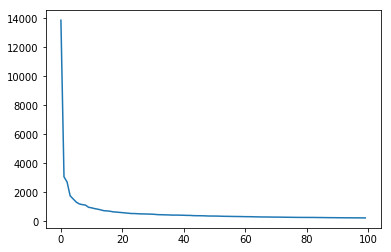

In [201]:
M = np.log(1+occur_mat)
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(M, n_components=100) # 感觉也挺快的就不存了吧
U.shape, Sigma.shape, VT.shape

plt.plot(range(len(Sigma)), Sigma)

Does M˜ seem to be close to a low rank matrix?
<font color='blue'>
    Yes, cause singular near to zero after 20.

In [12]:
M_ = U.dot(np.diag(Sigma)).dot(VT)

### c)

In [21]:
for i in range(20):
    v = U[:, i]
    largest_ind = np.argsort(v)[-10:]
    smallest_ind = np.argsort(v)[:10]
    print("\n%d: "% i)
    print("largest: ", end='')
    for ind in largest_ind:
        print(ind2word(ind), end=', ')
    print("\nsmallest: ", end='')
    for ind in smallest_ind:
        print(ind2word(ind), end=', ')


0: 
largest: was, with, is, as, for, to, in, of, and, the, 
smallest: gmina, insee, householder, increment, midst, peakposition, outskirts, iucn, voivodeship, islander, 
1: 
largest: is, by, as, with, for, to, in, of, and, the, 
smallest: tournaments, leagues, innings, constituency, medals, continent, occasions, pupils, manga, locomotives, 
2: 
largest: michael, thomas, george, william, robert, jr, david, james, john, born, 
smallest: specific, any, data, provide, these, certain, different, systems, types, use, 
3: 
largest: municipal, northern, department, government, regional, national, university, council, county, district, 
smallest: you, album, love, me, my, song, episode, your, vocals, baby, 
4: 
largest: jewish, government, minister, rights, policy, legal, law, religious, social, political, 
smallest: jpg, km, located, near, road, river, lake, route, station, mountain, 
5: 
largest: attacked, emperor, had, were, them, they, soldiers, killed, him, troops, 
smallest: digital, sci

<font color='blue'>
We output the first 20 coloumn to find which are easy-to-interpret semantics.
* 3: Collective or individual
* 4: Ideology or entity
* 5: History war or mordern science
* 6: Art or Science
* 14: Daily life or war



### d)

In [126]:
U_ = U / np.sqrt(np.sum(U*U, axis=1).reshape(-1,1))
v1 = U_[word2ind("woman")]
v2 = U_[word2ind("man")]
v = v1 - v2
v /= np.sqrt(np.sum(v*v))

#### i)

       boy   -0.179178
      girl   0.146664
   brother   -0.308762
    sister   0.147322
      king   -0.213025
     queen   0.137198
        he   -0.094201
       she   0.059879
      john   -0.194742
      mary   0.337449
      wall   -0.056734
      tree   -0.004983


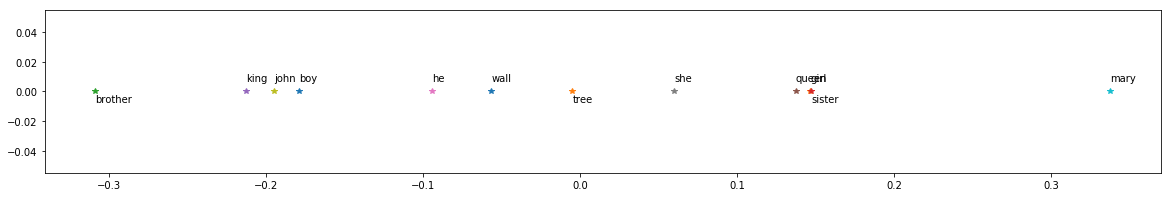

In [129]:
di_list = ["boy", "girl", "brother", "sister", "king", "queen", "he", "she", "john", "mary", "wall", "tree"]
pro_list = np.zeros(len(di_list))

plt.figure(figsize=[20, 3])

for i in range(len(di_list)):
    word = di_list[i]
    pro_list[i] =  np.dot(U_[word2ind(word)],v)/(np.linalg.norm(v))
    plt.plot(pro_list[i], 0, '*')
    plt.text(pro_list[i], np.sign(np.random.rand()-0.5)*0.007, word)
    print("%10s   %.6lf"%(word, pro_list[i]))
    


    

<font color='blue'>
    We can observe that the word pairs such as (boy, girl) which are different by gender would distribute on different side of 0. And the word not about gender such as wall or tree , are close to 0. <br>
    We can say that the vector `woman - man` denoting the gender, and female is the positive direction. <br>
    We find it interesting that word "marry" is the most positive one on the gender direction, which show "marry" is related to "woman" far more than "man".

#### ii)


      math   -0.083791
    matrix   -0.037170
   history   -0.117132
     nurse   0.372734
    doctor   -0.086292
     pilot   -0.011075
   teacher   0.165023
  engineer   -0.238900
   science   -0.062117
      arts   0.188262
literature   0.106687
       bob   -0.128007
     alice   0.281873


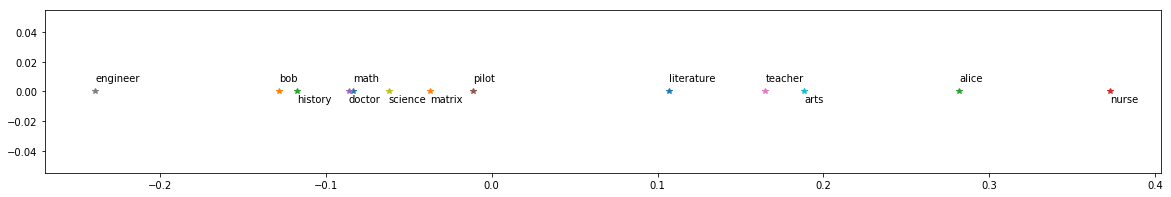

In [130]:
di_list = ["math", "matrix","history", "nurse", "doctor", "pilot", "teacher", "engineer", "science", "arts", "literature", "bob", "alice"]
pro_list = np.zeros(len(di_list))

plt.figure(figsize=[20, 3])

for i in range(len(di_list)):
    word = di_list[i]
    pro_list[i] =  np.dot(U_[word2ind(word)],v)/(np.linalg.norm(v))
    plt.plot(pro_list[i], 0, '*')
    plt.text(pro_list[i], np.sign(np.random.rand()-0.5)*0.007, word)
    print("%10s   %.6lf"%(word, pro_list[i]))

<font color='blue'>
    We can see that some major such as "engineer", "history", "math", "doctor", "science" are more closed to male side, and "teacher", "art", "nurse" are closed to female side.<br>
    This case might be caused by the social culture's prejudice on different gender, and this may cause more prejudices if we use the existing prejudices to predict something like "search for qualified job candidates". 

### e)

#### i)

In [136]:
# similarity_mat = np.zeros((10000, 10000))
# for i in range(10000):
#     if i%100==0:
#         print(i)
#     for j in range(i,10000):
#         similarity_mat[i][j] = np.dot(U_[i],U_[j])
#         similarity_mat[j][i] = similarity_mat[i][j]
# np.save("similarity_mat.npy", similarity_mat)

similarity_mat = np.load("similarity_mat.npy")
print(similarity_mat)
        

[[1.         0.82507188 0.83591488 ... 0.07570692 0.0941387  0.08905585]
 [0.82507188 1.         0.7826799  ... 0.05873232 0.049944   0.05031579]
 [0.83591488 0.7826799  1.         ... 0.07399307 0.06186104 0.06318703]
 ...
 [0.07570692 0.05873232 0.07399307 ... 1.         0.32237008 0.25047993]
 [0.0941387  0.049944   0.06186104 ... 0.32237008 1.         0.18901727]
 [0.08905585 0.05031579 0.06318703 ... 0.25047993 0.18901727 1.        ]]


In [142]:
stanford_v = similarity_mat[word2ind("stanford")]
stanford_v[word2ind("stanford")] = 0
max_ind = np.argmax(stanford_v)
print(ind2word(max_ind))

harvard


#### ii)

In [145]:
def analogy(woman, man, king):
    woman_ind, man_ind, king_ind = word2ind(woman), word2ind(man), word2ind(king)
    quene_v = U_[woman_ind] - U_[man_ind] + U_[king_ind]
    sim = np.sum(U_ * quene_v, axis=1)
    sim[woman_ind] = 0
    sim[man_ind] = 0
    sim[king_ind] = 0
    return ind2word(np.argmax(sim))

analogy("woman", "man", "king")

'queen'

In [195]:
analogy_task = open("analogy_task.txt").readlines()
accuracy = 0
analogy_dict = {}
analogy_ind = 0


for task in analogy_task:
    man, woman, king, queen = task.split()
    if (man, woman) not in analogy_dict.keys():
        analogy_dict[(man, woman)] = analogy_ind
        analogy_ind += 1
    if (king, queen) not in analogy_dict.keys():
        analogy_dict[(king, queen)] = analogy_ind
        analogy_ind += 1
        
right_freq = np.zeros((analogy_ind, analogy_ind))
total_freq = np.zeros((analogy_ind, analogy_ind))


for task in analogy_task:
    man, woman, king, queen = task.split()
    my_queen = analogy(woman, man, king)
    if queen == my_queen:
        accuracy += 1
        right_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
    total_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
#     print(task[:-1], my_queen, queen==my_queen)
    

accuracy /= len(analogy_task)


athens greece bangkok thailand thailand True
athens greece beijing china korea False
athens greece berlin germany germany True
athens greece cairo egypt morocco False
athens greece canberra australia tanzania False
athens greece helsinki finland finland True
athens greece london england britain False
athens greece madrid spain argentina False
athens greece moscow russia romania False
athens greece oslo norway iceland False
athens greece ottawa canada quebec False
athens greece paris france france True
athens greece rome italy italy True
athens greece stockholm sweden norway False
athens greece tokyo japan japan True
bangkok thailand beijing china korea False
bangkok thailand berlin germany germany True
bangkok thailand cairo egypt morocco False
bangkok thailand canberra australia australia True
bangkok thailand helsinki finland finland True
bangkok thailand london england england True
bangkok thailand madrid spain argentina False
bangkok thailand moscow russia russia True
bangkok thail

tokyo japan athens greece greece True
tokyo japan bangkok thailand korea False
tokyo japan beijing china korea False
tokyo japan berlin germany germany True
tokyo japan cairo egypt egypt True
tokyo japan canberra australia australia True
tokyo japan helsinki finland finland True
tokyo japan london england britain False
tokyo japan madrid spain spain True
tokyo japan moscow russia russia True
tokyo japan oslo norway norway True
tokyo japan ottawa canada canada True
tokyo japan paris france france True
tokyo japan rome italy italy True
tokyo japan stockholm sweden norway False
athens greece bangkok thailand thailand True
athens greece beijing china korea False
athens greece belgrade serbia romania False
athens greece berlin germany germany True
athens greece brussels belgium belgium True
athens greece budapest hungary romania False
athens greece cairo egypt morocco False
athens greece canberra australia tanzania False
athens greece copenhagen denmark iceland False
athens greece dublin ir

madrid spain rome italy italy True
madrid spain santiago chile chile True
madrid spain sofia bulgaria hungary False
madrid spain stockholm sweden sweden True
manila philippines moscow russia ukraine False
manila philippines oslo norway netherlands False
manila philippines ottawa canada canada True
manila philippines paris france france True
manila philippines rome italy italy True
manila philippines santiago chile costa False
manila philippines sofia bulgaria romania False
manila philippines stockholm sweden netherlands False
manila philippines tokyo japan korea False
moscow russia oslo norway norway True
moscow russia ottawa canada quebec False
moscow russia paris france france True
moscow russia rome italy italy True
moscow russia santiago chile chile True
moscow russia sofia bulgaria romania False
moscow russia stockholm sweden norway False
moscow russia tokyo japan japan True
moscow russia vienna austria austria True
moscow russia warsaw poland poland True
oslo norway ottawa canada

philadelphia pennsylvania denver colorado illinois False
philadelphia pennsylvania baltimore maryland maryland True
philadelphia pennsylvania nashville tennessee vermont False
philadelphia pennsylvania louisville kentucky missouri False
philadelphia pennsylvania milwaukee wisconsin wyoming False
philadelphia pennsylvania portland oregon delaware False
philadelphia pennsylvania sacramento california wyoming False
philadelphia pennsylvania mesa arizona canyon False
philadelphia pennsylvania atlanta georgia illinois False
philadelphia pennsylvania miami florida illinois False
philadelphia pennsylvania oakland california maryland False
philadelphia pennsylvania cleveland ohio illinois False
philadelphia pennsylvania minneapolis minnesota vermont False
philadelphia pennsylvania arlington texas delaware False
philadelphia pennsylvania tampa florida delaware False
philadelphia pennsylvania lexington kentucky delaware False
philadelphia pennsylvania cincinnati ohio missouri False
philadelphia 

memphis tennessee baltimore maryland michigan False
memphis tennessee louisville kentucky iowa False
memphis tennessee milwaukee wisconsin wisconsin True
memphis tennessee portland oregon oregon True
memphis tennessee sacramento california oregon False
memphis tennessee mesa arizona canyon False
memphis tennessee atlanta georgia michigan False
memphis tennessee miami florida michigan False
memphis tennessee oakland california michigan False
memphis tennessee cleveland ohio michigan False
memphis tennessee minneapolis minnesota wisconsin False
memphis tennessee arlington texas delaware False
memphis tennessee tampa florida minnesota False
memphis tennessee pittsburgh pennsylvania michigan False
memphis tennessee lexington kentucky vermont False
memphis tennessee cincinnati ohio michigan False
memphis tennessee toledo ohio carolina False
memphis tennessee henderson nevada stevens False
memphis tennessee orlando florida carolina False
memphis tennessee chandler arizona bates False
memphis

milwaukee wisconsin chandler arizona greene False
milwaukee wisconsin irving texas herbert False
portland oregon sacramento california idaho False
portland oregon mesa arizona nevada False
portland oregon atlanta georgia oklahoma False
portland oregon miami florida arizona False
portland oregon oakland california nebraska False
portland oregon cleveland ohio oklahoma False
portland oregon minneapolis minnesota missouri False
portland oregon arlington texas wyoming False
portland oregon tampa florida arizona False
portland oregon pittsburgh pennsylvania nebraska False
portland oregon lexington kentucky arkansas False
portland oregon cincinnati ohio nebraska False
portland oregon toledo ohio nebraska False
portland oregon henderson nevada wheeler False
portland oregon orlando florida arizona False
portland oregon chandler arizona wheeler False
portland oregon madison wisconsin missouri False
portland oregon irving texas sherman False
sacramento california mesa arizona sierra False
sacram

toledo ohio worcester massachusetts hampshire False
toledo ohio chicago illinois illinois True
toledo ohio houston texas illinois False
toledo ohio philadelphia pennsylvania illinois False
toledo ohio phoenix arizona illinois False
toledo ohio dallas texas illinois False
toledo ohio jacksonville florida iowa False
toledo ohio indianapolis indiana illinois False
toledo ohio austin texas illinois False
toledo ohio detroit michigan michigan True
toledo ohio memphis tennessee illinois False
toledo ohio boston massachusetts pennsylvania False
toledo ohio seattle washington michigan False
henderson nevada orlando florida sacramento False
henderson nevada chandler arizona idaho False
henderson nevada madison wisconsin missouri False
henderson nevada irving texas wyoming False
henderson nevada worcester massachusetts idaho False
henderson nevada chicago illinois colorado False
henderson nevada houston texas arizona False
henderson nevada philadelphia pennsylvania kansas False
henderson nevada 

father mother king queen queen True
father mother man woman woman True
father mother nephew niece cousin False
father mother prince princess princess True
father mother son daughter daughter True
father mother sons daughters daughters True
father mother uncle aunt cousin False
father mother boy girl girl True
father mother brother sister sister True
father mother brothers sisters sisters True
grandfather grandmother grandson granddaughter niece False
grandfather grandmother he she she True
grandfather grandmother his her her True
grandfather grandmother husband wife wife True
grandfather grandmother king queen queen True
grandfather grandmother man woman woman True
grandfather grandmother nephew niece niece True
grandfather grandmother prince princess princess True
grandfather grandmother son daughter daughter True
grandfather grandmother sons daughters daughters True
grandfather grandmother uncle aunt aunt True
grandfather grandmother boy girl girl True
grandfather grandmother brother

complete completely possible possibly likely False
complete completely precise precisely totally False
complete completely professional professionally totally False
complete completely quick quickly totally False
complete completely rapid rapidly rapidly True
complete completely rare rarely totally False
complete completely safe safely totally False
complete completely serious seriously totally False
complete completely slow slowly slowly True
complete completely sudden suddenly totally False
complete completely typical typically entirely False
complete completely usual usually totally False
complete completely apparent apparently totally False
free freely immediate immediately sudden False
free freely most mostly many False
free freely obvious obviously evident False
free freely occasional occasionally periodically False
free freely possible possibly likely False
free freely precise precisely accurately False
free freely professional professionally individually False
free freely quick

quick quickly typical typically briefly False
quick quickly usual usually briefly False
quick quickly apparent apparently soon False
quick quickly complete completely eventually False
quick quickly free freely finally False
quick quickly immediate immediately soon False
quick quickly most mostly many False
quick quickly obvious obviously soon False
quick quickly occasional occasionally occasionally True
quick quickly possible possibly potential False
quick quickly precise precisely soon False
quick quickly professional professionally eventually False
rapid rapidly rare rarely quickly False
rapid rapidly safe safely safely True
rapid rapidly serious seriously seriously True
rapid rapidly slow slowly slowly True
rapid rapidly sudden suddenly suddenly True
rapid rapidly typical typically slowly False
rapid rapidly usual usually gradually False
rapid rapidly apparent apparently gradually False
rapid rapidly complete completely slowly False
rapid rapidly free freely freely True
rapid rapidl

bad worse heavy heavier heavier True
bad worse high higher higher True
bad worse large larger larger True
bad worse long longer shorter False
bad worse low lower lower True
bad worse new newer in False
bad worse old older pregnant False
bad worse short shorter shorter True
bad worse simple simpler simpler True
bad worse slow slower slower True
bad worse small smaller large False
bad worse strong stronger stronger True
bad worse wide wider wider True
bad worse young younger pregnant False
big bigger cheap cheaper cheaper True
big bigger deep deeper deeper True
big bigger easy easier easier True
big bigger fast faster faster True
big bigger good better better True
big bigger great greater tremendous False
big bigger hard harder harder True
big bigger heavy heavier heavier True
big bigger high higher higher True
big bigger large larger larger True
big bigger long longer shorter False
big bigger low lower higher False
big bigger new newer heavier False
big bigger old older older True
big b

large larger bad worse wrong False
large larger big bigger bigger True
large larger cheap cheaper cheaper True
large larger deep deeper deeper True
large larger easy easier easier True
large larger fast faster faster True
large larger good better better True
large larger great greater greater True
large larger hard harder harder True
large larger heavy heavier heavier True
large larger high higher higher True
long longer low lower higher False
long longer new newer now False
long longer old older older True
long longer short shorter shorter True
long longer simple simpler simply False
long longer slow slower slower True
long longer small smaller smaller True
long longer strong stronger stronger True
long longer wide wider normally False
long longer young younger male False
long longer bad worse wrong False
long longer big bigger bigger True
long longer cheap cheaper cheaper True
long longer deep deeper deeper True
long longer easy easier easier True
long longer fast faster slow False
l

young younger fast faster faster True
young younger good better better True
young younger great greater considerable False
young younger hard harder harder True
young younger heavy heavier heavier True
young younger high higher lower False
young younger large larger smaller False
young younger long longer shorter False
young younger low lower lower True
young younger new newer current False
young younger old older older True
young younger short shorter shorter True
young younger simple simpler similar False
young younger slow slower faster False
young younger small smaller smaller True
young younger strong stronger stronger True
young younger wide wider broad False
bad worst big biggest biggest True
bad worst fast fastest fastest True
bad worst good best perfect False
bad worst great greatest greatest True
bad worst high highest highest True
bad worst large largest largest True
bad worst long longest longest True
bad worst low lowest highest False
bad worst old oldest oldest True
bad w

dance dancing write writing read False
decrease decreasing describe describing describing True
decrease decreasing discover discovering discovering True
decrease decreasing fly flying flies False
decrease decreasing generate generating generating True
decrease decreasing go going come False
decrease decreasing implement implementing implementing True
decrease decreasing increase increasing increasing True
decrease decreasing jump jumping jumping True
decrease decreasing listen listening hear False
decrease decreasing look looking looking True
decrease decreasing move moving moving True
decrease decreasing play playing playing True
decrease decreasing read reading reads False
decrease decreasing run running running True
decrease decreasing say saying know False
decrease decreasing see seeing references False
decrease decreasing sing singing sang False
decrease decreasing sit sitting sat False
decrease decreasing swim swimming swimming True
decrease decreasing think thinking know False
d

jump jumping play playing playing True
jump jumping read reading reads False
jump jumping run running running True
jump jumping say saying think False
jump jumping see seeing references False
jump jumping sing singing singing True
jump jumping sit sitting sitting True
jump jumping swim swimming skating False
jump jumping think thinking thinking True
jump jumping walk walking walking True
jump jumping write writing writing True
jump jumping dance dancing dancing True
jump jumping decrease decreasing decreasing True
jump jumping describe describing describing True
jump jumping discover discovering discovering True
jump jumping fly flying flying True
jump jumping generate generating generating True
jump jumping go going going True
jump jumping implement implementing implementing True
jump jumping increase increasing increasing True
listen listening look looking looking True
listen listening move moving moving True
listen listening play playing playing True
listen listening read reading re

sing singing listen listening listening True
sing singing look looking looking True
sing singing move moving moving True
sing singing play playing playing True
sing singing read reading writing False
sing singing run running running True
sing singing say saying think False
sing singing see seeing references False
sit sitting swim swimming swimming True
sit sitting think thinking talking False
sit sitting walk walking walking True
sit sitting write writing composing False
sit sitting dance dancing dancing True
sit sitting decrease decreasing decreasing True
sit sitting describe describing describing True
sit sitting discover discovering discovering True
sit sitting fly flying flying True
sit sitting generate generating generating True
sit sitting go going going True
sit sitting implement implementing implementing True
sit sitting increase increasing increasing True
sit sitting jump jumping jumping True
sit sitting listen listening listening True
sit sitting look looking looking True
sit

brazil brazilian israel israeli israeli True
brazil brazilian italy italian italian True
brazil brazilian japan japanese japanese True
brazil brazilian korea korean korean True
brazil brazilian mexico mexican mexican True
brazil brazilian netherlands dutch danish False
brazil brazilian norway norwegian norwegian True
brazil brazilian poland polish hungarian False
brazil brazilian portugal portuguese portuguese True
brazil brazilian russia russian russian True
brazil brazilian spain spanish argentine False
brazil brazilian sweden swedish swedish True
brazil brazilian switzerland swiss swiss True
brazil brazilian thailand thai malaysian False
brazil brazilian ukraine ukrainian croatian False
brazil brazilian australia australian australian True
brazil brazilian austria austrian austrian True
bulgaria bulgarian chile chilean chilean True
bulgaria bulgarian china chinese chinese True
bulgaria bulgarian croatia croatian croatian True
bulgaria bulgarian denmark danish danish True
bulgaria bu

egypt egyptian austria austrian austrian True
egypt egyptian brazil brazilian brazilian True
egypt egyptian bulgaria bulgarian bulgarian True
egypt egyptian chile chilean chilean True
egypt egyptian china chinese chinese True
egypt egyptian croatia croatian croatian True
england english france french french True
england english germany german german True
england english greece greek greek True
england english india indian indian True
england english ireland irish french False
england english israel israeli israeli True
england english italy italian french False
england english japan japanese japanese True
england english korea korean korean True
england english mexico mexican spanish False
england english netherlands dutch czech False
england english norway norwegian finnish False
england english poland polish hungarian False
england english portugal portuguese spanish False
england english russia russian russian True
england english spain spanish spanish True
england english sweden sw

israel israeli england english scottish False
israel israeli france french belgian False
israel israeli germany german austrian False
israel israeli greece greek bulgarian False
israel israeli india indian pakistani False
italy italian japan japanese japanese True
italy italian korea korean korean True
italy italian mexico mexican mexican True
italy italian netherlands dutch swedish False
italy italian norway norwegian norwegian True
italy italian poland polish hungarian False
italy italian portugal portuguese portuguese True
italy italian russia russian russian True
italy italian spain spanish spanish True
italy italian sweden swedish swedish True
italy italian switzerland swiss swiss True
italy italian thailand thai indonesian False
italy italian ukraine ukrainian ukrainian True
italy italian australia australian australian True
italy italian austria austrian hungarian False
italy italian brazil brazilian brazilian True
italy italian bulgaria bulgarian bulgarian True
italy italian ch

poland polish japan japanese japanese True
poland polish korea korean korean True
poland polish mexico mexican mexican True
poland polish netherlands dutch swedish False
poland polish norway norwegian norwegian True
portugal portuguese russia russian russian True
portugal portuguese spain spanish spanish True
portugal portuguese sweden swedish swedish True
portugal portuguese switzerland swiss swiss True
portugal portuguese thailand thai thai True
portugal portuguese ukraine ukrainian ukrainian True
portugal portuguese australia australian australian True
portugal portuguese austria austrian hungarian False
portugal portuguese brazil brazilian brazilian True
portugal portuguese bulgaria bulgarian bulgarian True
portugal portuguese chile chilean chilean True
portugal portuguese china chinese chinese True
portugal portuguese croatia croatian croatian True
portugal portuguese denmark danish danish True
portugal portuguese egypt egyptian egyptian True
portugal portuguese england english sc

decreasing decreased describing described describes False
decreasing decreased falling fell fell True
decreasing decreased feeding fed breeding False
decreasing decreased flying flew flight False
decreasing decreased generating generated generated True
decreasing decreased going went coming False
decreasing decreased hitting hit throwing False
decreasing decreased implementing implemented implementation False
decreasing decreased increasing increased increased True
decreasing decreased jumping jumped jump False
decreasing decreased knowing knew realizing False
decreasing decreased looking looked looked True
decreasing decreased moving moved moved True
decreasing decreased paying paid paid True
decreasing decreased playing played played True
decreasing decreased reading read bibliography False
decreasing decreased running ran ran True
decreasing decreased saying said stating False
decreasing decreased seeing saw feeling False
decreasing decreased selling sold buying False
decreasing dec

hitting hit running ran run False
hitting hit saying said said True
hitting hit seeing saw love False
hitting hit selling sold sales False
hitting hit singing sang performed False
hitting hit sitting sat seated False
hitting hit spending spent unemployment False
hitting hit striking struck distinctive False
hitting hit taking took take False
hitting hit thinking thought thought True
hitting hit walking walked walk False
hitting hit writing wrote written False
hitting hit decreasing decreased decreased True
hitting hit describing described describe False
hitting hit falling fell fell True
hitting hit feeding fed feed False
hitting hit flying flew fly False
hitting hit generating generated generated True
hitting hit going went go False
implementing implemented increasing increased increased True
implementing implemented jumping jumped jump False
implementing implemented knowing knew satisfied False
implementing implemented looking looked looked True
implementing implemented moving moved 

paying paid falling fell fallen False
paying paid feeding fed feed False
paying paid flying flew flight False
paying paid generating generated generated True
paying paid going went went True
paying paid hitting hit handed False
paying paid implementing implemented implemented True
paying paid increasing increased increased True
paying paid jumping jumped jump False
paying paid knowing knew knows False
paying paid looking looked looked True
paying paid moving moved moved True
playing played reading read edited False
playing played running ran ran True
playing played saying said said True
playing played seeing saw sees False
playing played selling sold sold True
playing played singing sang performed False
playing played sitting sat seated False
playing played spending spent deficit False
playing played striking struck struck True
playing played taking took took True
playing played thinking thought thought True
playing played walking walked walk False
playing played writing wrote wrote Tr

sitting sat moving moved moved True
sitting sat paying paid paid True
sitting sat playing played played True
sitting sat reading read pp False
sitting sat running ran ran True
sitting sat saying said stating False
sitting sat seeing saw realizing False
sitting sat selling sold sold True
sitting sat singing sang sang True
spending spent striking struck struck True
spending spent taking took took True
spending spent thinking thought thought True
spending spent walking walked hiking False
spending spent writing wrote wrote True
spending spent decreasing decreased decreased True
spending spent describing described describes False
spending spent falling fell fell True
spending spent feeding fed feed False
spending spent flying flew flew True
spending spent generating generated generator False
spending spent going went went True
spending spent hitting hit struck False
spending spent implementing implemented framework False
spending spent increasing increased increased True
spending spent jum

building buildings hand hands hands True
building buildings horse horses horses True
building buildings lion lions tiger False
building buildings machine machines machines True
building buildings man men woman False
building buildings mouse mice rabbit False
building buildings rat rats rats True
building buildings road roads roads True
building buildings woman women girl False
building buildings bird birds birds True
car cars cat cats rabbit False
car cars child children children True
car cars cloud clouds clouds True
car cars color colors colors True
car cars computer computers computers True
car cars dog dogs dogs True
car cars dollar dollars dollars True
car cars dream dreams dreams True
car cars eagle eagles hawk False
car cars eye eyes eyes True
car cars finger fingers fingers True
car cars hand hands hands True
car cars horse horses horses True
car cars lion lions cats False
car cars machine machines machines True
car cars man men men True
car cars mouse mice rabbit False
car car

eye eyes cat cats dog False
eye eyes child children daughter False
eye eyes cloud clouds clouds True
eye eyes color colors colors True
eye eyes computer computers computers True
eye eyes dog dogs cat False
eye eyes dollar dollars dollars True
eye eyes dream dreams dreams True
eye eyes eagle eagles hawk False
finger fingers hand hands hands True
finger fingers horse horses horses True
finger fingers lion lions cats False
finger fingers machine machines machines True
finger fingers man men boy False
finger fingers mouse mice rabbit False
finger fingers rat rats rats True
finger fingers road roads street False
finger fingers woman women girl False
finger fingers bird birds birds True
finger fingers building buildings buildings True
finger fingers car cars cars True
finger fingers cat cats dog False
finger fingers child children children True
finger fingers cloud clouds clouds True
finger fingers color colors colour False
finger fingers computer computers computers True
finger fingers dog 

woman women rat rats rats True
woman women road roads street False
describe describes estimate estimates estimates True
describe describes find finds finds True
describe describes go goes goes True
describe describes increase increases increases True
describe describes play plays plays True
describe describes provide provides provides True
describe describes say says says True
describe describes see sees references False
describe describes sing sings sang False
describe describes sit sits sat False
describe describes speak speaks speaks True
describe describes talk talks news False
describe describes think thinks says False
describe describes walk walks walking False
describe describes work works works True
describe describes write writes writes True
estimate estimates find finds finds True
estimate estimates go goes come False
estimate estimates increase increases increased False
estimate estimates play plays played False
estimate estimates provide provides provides True
estimate esti

walk walks describe describes describes True
walk walks estimate estimates estimates True
walk walks find finds finds True
walk walks go goes goes True
walk walks increase increases increases True
walk walks play plays plays True
walk walks provide provides provides True
walk walks say says knows False
walk walks see sees references False
walk walks sing sings sang False
walk walks sit sits sits True
walk walks speak speaks speaks True
walk walks talk talks news False
walk walks think thinks thinks True
work works write writes publish False
work works describe describes describes True
work works estimate estimates estimates True
work works find finds finds True
work works go goes come False
work works increase increases increases True
work works play plays plays True
work works provide provides provides True
work works say says know False
work works see sees references False
work works sing sings sang False
work works sit sits stand False
work works speak speaks speaks True
work works 

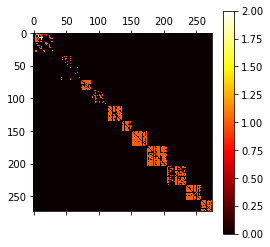

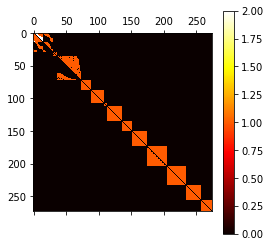

In [198]:
plt.matshow(right_freq, cmap='hot')
plt.colorbar()

plt.matshow(total_freq, cmap='hot')
plt.colorbar()

In [157]:
print("accuracy of analogy task is %.5lf" % accuracy)

accuracy of analogy task is 0.54342


In [200]:
analogy_dict

{('athens', 'greece'): 0,
 ('bangkok', 'thailand'): 1,
 ('beijing', 'china'): 2,
 ('berlin', 'germany'): 3,
 ('cairo', 'egypt'): 4,
 ('canberra', 'australia'): 5,
 ('helsinki', 'finland'): 6,
 ('london', 'england'): 7,
 ('madrid', 'spain'): 8,
 ('moscow', 'russia'): 9,
 ('oslo', 'norway'): 10,
 ('ottawa', 'canada'): 11,
 ('paris', 'france'): 12,
 ('rome', 'italy'): 13,
 ('stockholm', 'sweden'): 14,
 ('tokyo', 'japan'): 15,
 ('belgrade', 'serbia'): 16,
 ('brussels', 'belgium'): 17,
 ('budapest', 'hungary'): 18,
 ('copenhagen', 'denmark'): 19,
 ('dublin', 'ireland'): 20,
 ('kiev', 'ukraine'): 21,
 ('kingston', 'jamaica'): 22,
 ('lima', 'peru'): 23,
 ('lisbon', 'portugal'): 24,
 ('manila', 'philippines'): 25,
 ('santiago', 'chile'): 26,
 ('sofia', 'bulgaria'): 27,
 ('vienna', 'austria'): 28,
 ('warsaw', 'poland'): 29,
 ('brazil', 'real'): 30,
 ('canada', 'dollar'): 31,
 ('europe', 'euro'): 32,
 ('korea', 'won'): 33,
 ('usa', 'dollar'): 34,
 ('vietnam', 'dong'): 35,
 ('chicago', 'illinois'

<font color="blue">
    The total accuracy is 54.342%.<br>
    From the thermodynamic diagram we can see, the first plot is accuacy between pair such as (man, woman), and the second one is whether the pair has been tested in analogy tasks. Section [40, 60] and [100, 110] show lower accuracy, and print the word pairs of these 2 sections we can see that they represent the relationship between city and state, adjectives and adverbs. <br>
    In other word, the word embadding show weak on analogy the relationship between city and state, adjectives and adverbs.

#### III)

In [226]:
M = np.log(1+occur_mat)
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(M, n_components=300) # 感觉也挺快的就不存了吧
print(U.shape, Sigma.shape, VT.shape)

U_ = U / np.sqrt(np.sum(U*U, axis=1).reshape(-1,1))


(10000, 300) (300,) (300, 10000)


accuracy of analogy task is 0.61003


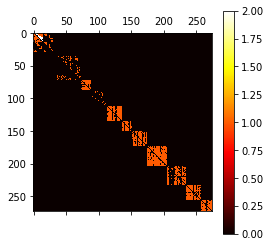

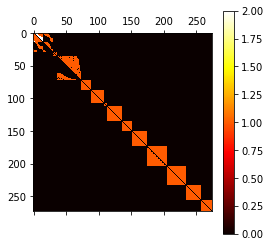

In [227]:
analogy_task = open("analogy_task.txt").readlines()
accuracy = 0
analogy_dict = {}
analogy_ind = 0


for task in analogy_task:
    man, woman, king, queen = task.split()
    if (man, woman) not in analogy_dict.keys():
        analogy_dict[(man, woman)] = analogy_ind
        analogy_ind += 1
    if (king, queen) not in analogy_dict.keys():
        analogy_dict[(king, queen)] = analogy_ind
        analogy_ind += 1
        
right_freq = np.zeros((analogy_ind, analogy_ind))
total_freq = np.zeros((analogy_ind, analogy_ind))


for task in analogy_task:
    man, woman, king, queen = task.split()
    my_queen = analogy(woman, man, king)
    if queen == my_queen:
        accuracy += 1
        right_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
    total_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
#     print(task[:-1], my_queen, queen==my_queen)
    

accuracy /= len(analogy_task)

plt.matshow(right_freq, cmap='hot')
plt.colorbar()

plt.matshow(total_freq, cmap='hot')
plt.colorbar()

print("accuracy of analogy task is %.5lf" % accuracy)

<font color='blue'>
    We try to increase the remain components from 100 to 300, and gain higher accuracy but take too much time.

# TODO

In [229]:
M = np.log(1+occur_mat)
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(M, n_components=100) # 感觉也挺快的就不存了吧
print(U.shape, Sigma.shape, VT.shape)

U_ = U / np.sqrt(np.sum(U*U, axis=1).reshape(-1,1))



(10000, 100) (100,) (100, 10000)


accuracy of analogy task is 0.07556


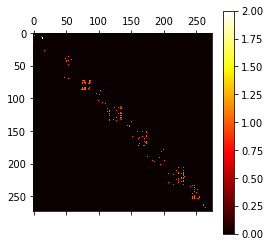

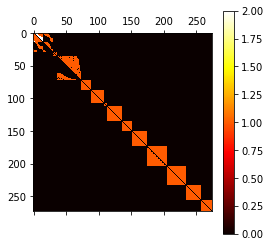

In [230]:
analogy_task = open("analogy_task.txt").readlines()
accuracy = 0
analogy_dict = {}
analogy_ind = 0


for task in analogy_task:
    man, woman, king, queen = task.split()
    if (man, woman) not in analogy_dict.keys():
        analogy_dict[(man, woman)] = analogy_ind
        analogy_ind += 1
    if (king, queen) not in analogy_dict.keys():
        analogy_dict[(king, queen)] = analogy_ind
        analogy_ind += 1
        
right_freq = np.zeros((analogy_ind, analogy_ind))
total_freq = np.zeros((analogy_ind, analogy_ind))


for task in analogy_task:
    man, woman, king, queen = task.split()
    my_queen = analogy(woman, man, king)
    if queen == my_queen:
        accuracy += 1
        right_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
    total_freq[analogy_dict[(man, woman)]][analogy_dict[(king, queen)]] += 1
#     print(task[:-1], my_queen, queen==my_queen)
    

accuracy /= len(analogy_task)

plt.matshow(right_freq, cmap='hot')
plt.colorbar()

plt.matshow(total_freq, cmap='hot')
plt.colorbar()

print("accuracy of analogy task is %.5lf" % accuracy)


# Part 2
a)stripe
b)k=..., recover
c)sb
d)压缩效果
e)第800维

### a)
<font color='blue'>
    We guess that the picture with rank 1 approximation given by SVD should be **in strip style**, and can be distinguish different color faintly.

### b)

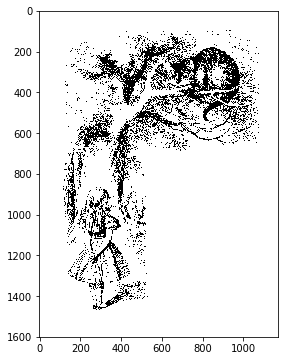

In [268]:
from PIL import Image
im = np.array(Image.open('p5_image.gif').convert('L')).astype("float32")/255
plt.figure(figsize=[10,6])
plt.imshow(im, cmap ='gray')

In [271]:
U, Sigma, VT = np.linalg.svd(im)
print(U.shape, Sigma.shape, VT.shape)

(1600, 1600) (1170,) (1170, 1170)


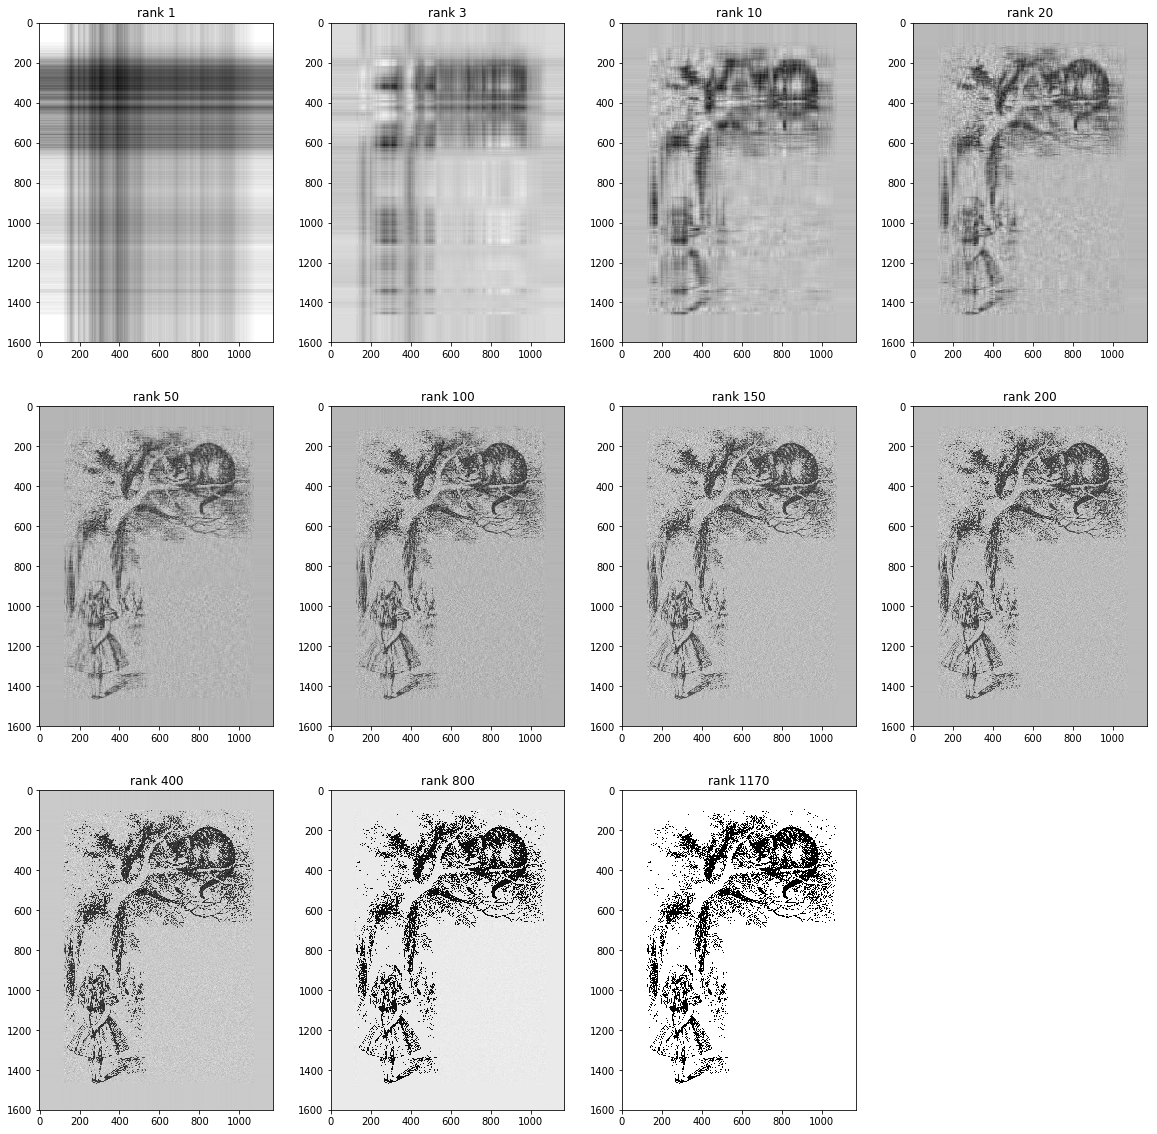

In [298]:
def recover(k):
    return U[:,:k].dot(np.diag(Sigma[:k])).dot(VT[:k, :])

k_lists = [1, 3, 10, 20, 50, 100, 150, 200, 400, 800, 1170]
ind = 1
plt.figure(figsize=[20, 20])
for k in k_lists:
    plt.subplot(3, 4, ind)
    im_k = recover(k)
    min_im = np.min(im_k)
    max_im = np.max(im_k)
    im_k = (im_k-min_im) / (max_im-min_im)
    plt.imshow(im_k, cmap ='gray')
    plt.title("rank %d"%k)
    ind += 1

<font color='blue'>
    As the rank increase, picture became clearer. The rank denoting how much horizontal and vertical lines to draw the picture. In rank 1, we can see only the most bright and the most dark lines describing the picture. As the rank increase, more horizontal and vertical lines began to help to describe the picture.

### c)

<font color='blue'>
    Because the origin picture's rank is 1170, so we cannot get higher rank.

### d)

<font color='blue'>
    For the origin picture, we should store 1 unit for each pixel, totally is $1*1600*1170=1872000$ units.<br>
    For the compress picture, we should only store the $U_k, \Sigma_k, V^T_k$ for k is the rank. Shape of $U_k, \Sigma_k, V^T_k$ are $(1600, k), (k, k), (1170, k)$, because $\Sigma_k$ is a diagonal matrix, so we can only store k units for its diagonal elements. Totally we should store $1600*150 + 150 + 1170*150=415650$ units for $k=150$.<br>
    The compression ratio of using SVD rank 150 approximation is  $415640 / 1872000 = 0.222$. For this picture, totally can reduce 1456360 units space.

### e) Bonus

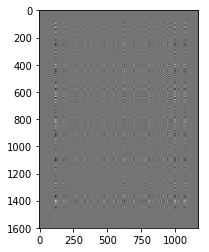

In [320]:
plt.imshow((U[:,800] * Sigma[800]).reshape(-1, 1) @ VT[800,:].reshape(1,-1), cmap="gray")

<font color='blue'>
     TODO